Author: Nicole Mazzitelli Narvaz

Estimando razão sinal-ruído (o quanto de sinal possuo no meio do ruído).

In [30]:
import glob 
from os import path 
from time import perf_counter as clock

In [31]:
from astropy.io import fits
from scipy import ndimage 
import numpy as np

In [32]:
import matplotlib.pyplot as plt

In [33]:
eso325_dir = '/home/nicole/eso325/espectros' #caminho da pasta

In [34]:
file = eso325_dir + '/36x43.fits'    #Nome do arquivo
hdu = fits.open(file)                #Abertura do arquivo #This is the top-level FITS object. When a FITS file is opened, a HDUList object is returned.
gal_lin = hdu[1].data                #Fluxo
h1 = hdu[1].header                   #Header

noise = np.sqrt(hdu[2].data) # tirando raiz da extensão STAT do arquivo FITS(variância de cada medida), calculando ruído como desvio padr

In [35]:
lamRange1 = h1['CRVAL1'] + np.array([0., h1['CDELT1']*(h1['NAXIS1'] - 1)]) #define comprimento de onda inicial e final em um array.
FWHM_gal = 2.71  #medida do quanto o telesc. consegue separar 2 linhas de absorção que estão próximas.

In [36]:
wave = np.arange(lamRange1[0], lamRange1[1] + 1.25 , 1.25)

In [40]:
mask = (wave>5200)&(wave<5320)

In [41]:
gal_lin = gal_lin[mask] #novo fluxo mascarado (até 5600A)
wave    = wave[mask]    #novo comprimento de onda mascarado (até 5600A)
noise   = noise[mask]   #novo noise mascarado (até 5600A)

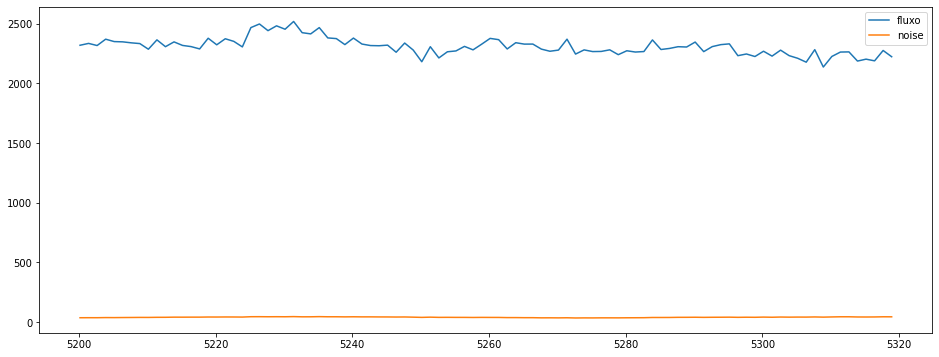

In [42]:
plt.figure(figsize=(16,6))
plt.plot(wave, gal_lin, label="fluxo")
plt.plot(wave, noise, label="noise")

plt.legend()

In [43]:
sinal = np.average(gal_lin) #media do sinal
ruido = np.average(noise)  #media do noise
snr = sinal/ruido #quanto de sinal tenho no meio do ruido

In [44]:
print(sinal, ruido, snr)

2308.4617 40.567028 56.904877


In [45]:
for y in range(75):
    for x in range(90):
        file = eso325_dir + '/%dx%d.fits'%(y,x)    #Nome do arquivo
        hdu = fits.open(file)                #Abertura do arquivo #This is the top-level FITS object. When a FITS file is opened, a HDUList object is returned.
        gal_lin = hdu[1].data                #Fluxo
        h1 = hdu[1].header                   #Header

        noise = np.sqrt(hdu[2].data) 
       
        lamRange1 = h1['CRVAL1'] + np.array([0., h1['CDELT1']*(h1['NAXIS1'] - 1)]) #define comprimento de onda inicial e final em um array.
        
        wave = np.arange(lamRange1[0], lamRange1[1] + 1.25 , 1.25)
        
        mask = wave < 5600
        
        gal_lin = gal_lin[mask] #novo fluxo mascarado (até 5600A)
        wave    = wave[mask]    #novo comprimento de onda mascarado (até 5600A)
        noise   = noise[mask]   #novo noise mascarado (até 5600A)
        
        sinal = np.average(gal_lin) #media do sinal
        ruido = np.average(noise)   #media do noise
        snr = sinal/ruido           #quanto de sinal tenho no meio do ruido
        
        newrow = [np.int(y),np.int(x),sinal,ruido,snr]
        if y == 0 and x == 0:
            table = np.array([np.int(y),np.int(x),sinal,ruido,snr])
        else:
            table = np.vstack([table,newrow]) #adiciona uma linha na vertical abaixo da linha acima.

/tmp/ipykernel_4254/2104574567.py:24: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  newrow = [np.int(y),np.int(x),sinal,ruido,snr]
/tmp/ipykernel_4254/2104574567.py:26: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in

In [46]:
np.savetxt('SNR4750_5600A.txt',table,header= 'y x sinal ruido snr', fmt='%i %i %10e %10e %10e',delimiter=' ') #Salva a tabela

# OU outra forma de fazer com while

y=0
while y <5:
  x=0
  while x <9:
    print(y,x)
    x = x+1
  y=y+1

o que faltou foi fazer o x=0 dentro do loop em y. Sem isso, ele entra no loop while para y=0, varre todas os valores de x e imprime eles, vai para y=1, só que não entra no loop de x, pois o x não foi zerado (ele fica no último valor, que nesse caso acima era 8 ). Aí ele até varre todos os outros y's, só que não imprime, pois o print está dentro do loop em x.